# CSC494 - Final Project
## American Sign Language Recognizer

# Dataset

In [1]:
import os
dataset_dir = f'{os.getcwd()}/../dataset'
path_to_training = f'{dataset_dir}/asl_alphabet_train/asl_alphabet_train/'
path_to_testing = f'{dataset_dir}/asl_alphabet_test/asl_alphabet_test/' # Lets use this for blind testing (i.e. the images were not used to validate during the training process)

f'[Path to training exists >> {os.path.exists(path_to_training)}]' \
f'[Path to testing exists >> {os.path.exists(path_to_testing)}]'

'[Path to training exists >> True][Path to testing exists >> True]'

In [2]:
categories = [f.name for f in os.scandir(path_to_training)]
categories

['D',
 'O',
 'M',
 'K',
 'Q',
 'Y',
 'J',
 'space',
 'I',
 'A',
 'S',
 'nothing',
 'L',
 'C',
 'U',
 'N',
 'W',
 'B',
 'H',
 'V',
 'F',
 'Z',
 'del',
 'T',
 'X',
 'R',
 'G',
 'E',
 'P']

2022-04-15 13:04:49.083577: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-15 13:04:49.083598: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/levi/PycharmProjects/CSC494-GroupProject/venv/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.


/home/levi/PycharmProjects/CSC494-GroupProject/venv/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/levi/PycharmProjects/CSC494-GroupProject/venv/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


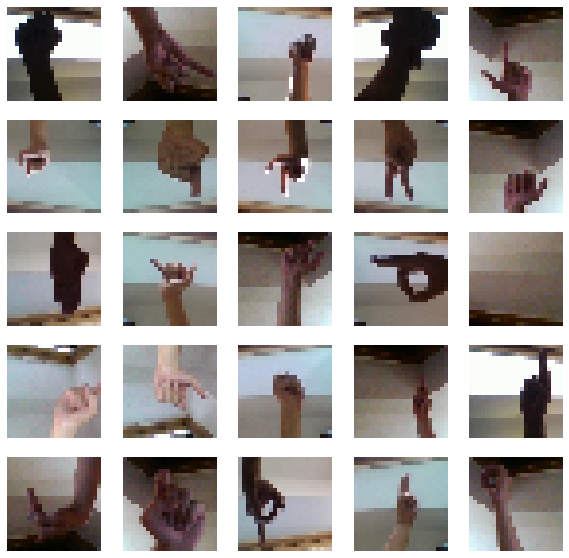

In [3]:
from image_cnn import ASLClassifier
asl_clf = ASLClassifier()
asl_clf.load_dataset(path_to_training, img_shape=(24, 24, 3))
asl_clf.display_25_img()

In [4]:
asl_clf.compile_model()

2022-04-15 13:04:55.631486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-15 13:04:55.631546: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-15 13:04:55.631575: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (levi-Q525UAR): /proc/driver/nvidia/version does not exist
2022-04-15 13:04:55.631843: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
asl_clf.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [6]:
print(asl_clf.train_set)
print(asl_clf.test_set)

In [7]:
asl_clf.train()

Epoch 1/20
1904/1904 [==============================] - 75s 39ms/step - loss: 2.0846 - accuracy: 0.3517 - val_loss: 2.0447 - val_accuracy: 0.3555
Epoch 2/20
1904/1904 [==============================] - 63s 33ms/step - loss: 1.1314 - accuracy: 0.6198 - val_loss: 1.8320 - val_accuracy: 0.4406
Epoch 3/20
1904/1904 [==============================] - 62s 33ms/step - loss: 0.8273 - accuracy: 0.7148 - val_loss: 1.9130 - val_accuracy: 0.4621
Epoch 4/20
1904/1904 [==============================] - 63s 33ms/step - loss: 0.6606 - accuracy: 0.7713 - val_loss: 1.9982 - val_accuracy: 0.4835
Epoch 5/20
1904/1904 [==============================] - 64s 33ms/step - loss: 0.5476 - accuracy: 0.8098 - val_loss: 1.9447 - val_accuracy: 0.5135
Epoch 6/20
1904/1904 [==============================] - 62s 33ms/step - loss: 0.4770 - accuracy: 0.8340 - val_loss: 1.9952 - val_accuracy: 0.5267
Epoch 7/20
1904/1904 [==============================] - 62s 32ms/step - loss: 0.4207 - accuracy: 0.8544 - val_loss: 2.0495 -